<a href="https://colab.research.google.com/github/bzwartsenberg/feed-forward-style-transfer/blob/master/feed_forward_neural_style_evaluate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementation of feedforward style

Based this on paper by Johnson et al, Arxiv:1603.08155v1.

Using this theano/keras implementation as a reference: https://github.com/jayanthkoushik/neural-style/blob/master/neural_style/fast_neural_style/transformer_net.py

This implementation uses keras/tensorflow.

The loss function comes from the generation of Gramm matrices from a pretrained vgg-19 network, combined with a content loss based on the mean squared error of an activation in the same model.

This notebook allows to train a new network from scratch using a particular style image.

Note that the use of gram features has makes the style features related to the style image size, as it captures elements of certain pixel sizes. This means that for the best results, use a style image of the same resolution as the intended evaluation size.

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os
if not 'The_Great_Wave_off_Kanagawa.jpg' in os.listdir():
    !wget --quiet -P /content/ https://upload.wikimedia.org/wikipedia/commons/0/0a/The_Great_Wave_off_Kanagawa.jpg
    !wget --quiet -P /content/ https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/1024px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg
    !wget --quiet -P /content/ https://jkoushik.me/imgs/neural_style/style/fulls/stained_glass.jpg
    !wget --quiet -P /content/ https://jkoushik.me/imgs/neural_style/style/fulls/wave.jpg        
        #beech forest canopy
    !wget --quiet -P /content/ http://www.photosofireland.ie/phot/photos/green-canopy-beech%20wmark.jpg
        #strawberries
    !wget --quiet -P /content/ https://i.kinja-img.com/gawker-media/image/upload/s--MNEJonW5--/c_scale,f_auto,fl_progressive,q_80,w_800/xicsb4sryd8dydbqm7yj.jpg
        # succulent
    !wget --quiet -P /content/ https://media.freestocktextures.com/cache/b4/ca/b4ca5dacf9e92f51798ff22f2dc46a01.jpg
        # forest
    !wget --quiet -P /content/ https://images2.minutemediacdn.com/image/upload/c_crop,h_1151,w_2048,x_0,y_149/f_auto,q_auto,w_1100/v1555274683/shape/mentalfloss/31105585103_4c32392ac1_k.jpg
        #matisse:
    !wget --quiet -P /content/ https://www.cineclubdecaen.com/peinture/peintres/matisse/luxecalmeetvolupte.jpg


In [3]:
if not os.path.exists('feed-forward-style-transfer'):
    !git clone https://github.com/bzwartsenberg/feed-forward-style-transfer
!git -C feed-forward-style-transfer pull origin master
import sys
sys.path.append('feed-forward-style-transfer/')

From https://github.com/bzwartsenberg/feed-forward-style-transfer
 * branch            master     -> FETCH_HEAD
Already up to date.


In [4]:
from styletransfer import StyleTransfer
from preprocessing import imshow, load_and_process_img

Using TensorFlow backend.


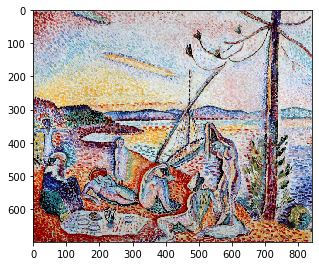

In [5]:
style_image_path = 'luxecalmeetvolupte.jpg'
im = load_and_process_img(style_image_path, resize = None, crop = False)
imshow(im)

In [6]:
path = '/content/gdrive/My Drive/colab_files/style_transfer/'
load_path = '/content/gdrive/My Drive/colab_files/style_transfer/00003/best_checkpoint.h5'
st = StyleTransfer(style_image_path, path, style_weight=1., content_weight=1., 
                 input_size=(256,256), optimizer=None, sub_path=None,
                 test_photo_path=None, load_model = load_path)


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [0]:
if not '800px-00_0472_Bascule_bridge_-_Enkhuizen.jpg' in os.listdir():
    !wget --quiet -P /content/ 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/2c/00_0472_Bascule_bridge_-_Enkhuizen.jpg/800px-00_0472_Bascule_bridge_-_Enkhuizen.jpg'
    !wget --quiet -P /content/ 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/11-11-06-ragoese-by-RalfR-02.jpg/1599px-11-11-06-ragoese-by-RalfR-02.jpg'
    !wget --quiet -P /content/ 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e9/1._SC_Sollenau_vs._FC_Red_Bull_Salzburg_2014-07-12_%28146%29.jpg/1200px-1._SC_Sollenau_vs._FC_Red_Bull_Salzburg_2014-07-12_%28146%29.jpg'
    !wget --quiet -P /content/ 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/b4/12%C3%A8me_%C3%A9tape_Tour_de_France_2018_%28groupe_maillot_jaune_%C3%A0_St-Jean-de-Maurienne%29.JPG/1600px-12%C3%A8me_%C3%A9tape_Tour_de_France_2018_%28groupe_maillot_jaune_%C3%A0_St-Jean-de-Maurienne%29.JPG'



In [0]:
import matplotlib.pyplot as plt

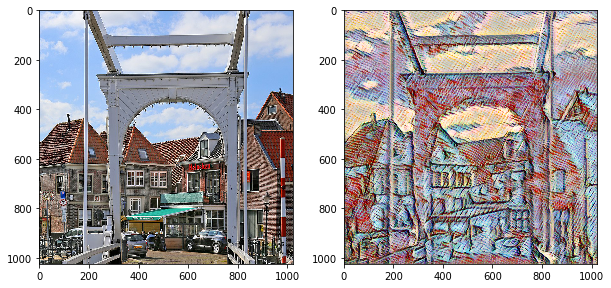

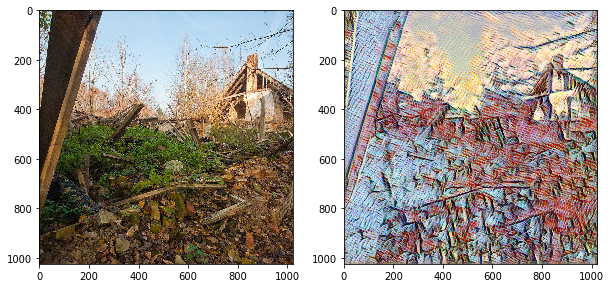

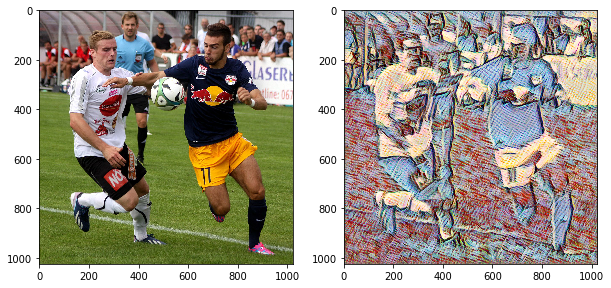

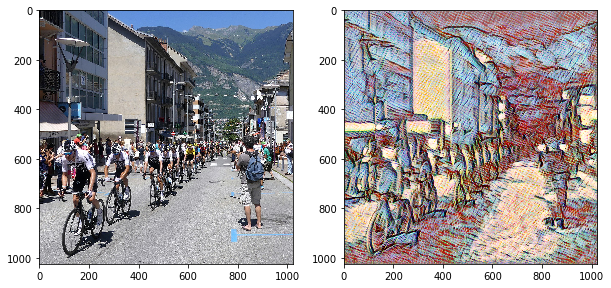

In [10]:
eval_im_size = (1024,1024)

paths = ['800px-00_0472_Bascule_bridge_-_Enkhuizen.jpg',
         '1599px-11-11-06-ragoese-by-RalfR-02.jpg',
         '1200px-1._SC_Sollenau_vs._FC_Red_Bull_Salzburg_2014-07-12_(146).jpg',
         '1600px-12ème_étape_Tour_de_France_2018_(groupe_maillot_jaune_à_St-Jean-de-Maurienne).JPG']

path = '/content/gdrive/My Drive/colab_files/style_transfer/'
style_image_path = 'luxecalmeetvolupte.jpg'


st_eval = StyleTransfer(style_image_path, path, style_weight=1., content_weight=1., 
                 input_size=eval_im_size, optimizer=None, sub_path=None,
                 test_photo_path=None)

st_eval.generator.set_weights(st.generator.get_weights())

for i,testimpath in enumerate(paths):
    fig,ax = plt.subplots(1,2, figsize = (10,5))
    im = load_and_process_img(testimpath, resize = 1024, crop = True)
    imshow(im, ax = ax[0])

    out_im = st_eval.generator.predict(im)
    imshow(out_im, ax = ax[1])

